In [1]:
import tensorflow as tf    # tensorflow를 import하고, 이름을 tf로 지정 
import numpy as np    # numpy를 import하고, 이름을 np로 지정
import matplotlib.pyplot as plt    # matplotlib 라이브러리의 pyplot 모듈을 import하고, 이름을 plt로 지정

tf.enable_eager_execution()    # 즉시 실행(Eager Execution) 모드로 변경(그래프 기반 모드에서 즉시 실행 모드로 변경)
tf.__version__   # tensorflow version check

'1.13.1'

In [2]:
X = np.array([1, 2, 3])    # X 정의
Y = np.array([1, 2, 3])    # Y 정의

In [3]:
def cost_func(W, X, Y):    # cost_func 함수 정의
    c = 0    # c를 0으로 초기화
    for i in range(len(X)):    # X의 element 개수 만큼 반복
        c += (W * X[i] - Y[i]) ** 2    # c = c + (W * X[i] - Y[i])^2.    ∑(i=1~m) (H(xi)-(yi))^2 과 동일
    return c / len(X)    # cost function value (c / len(X)) return.    (1/m) * ∑(i=1~m) (H(xi)-(yi))^2 과 동일

for feed_W in np.linspace(-3, 5, num=15):    # np.linspace(-3, 5, num=15)는 [-3, 5] 에서
                                             # 동일한 간격의 15개 숫자들을 element로 갖는 
                                             # narray 반환. feed_W는 각 np.linspace(-3, 5, num=15)의
                                             # element를 순차적으로 참조 
    curr_cost = cost_func(feed_W, X, Y)    # feed_W에 따른 cost function을 curr_cost가 참조
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))    # feed_W(weight), curr_cost(cost function) 값 출력 

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [4]:
# 위의 함수(Pure Python Code)와 동일한 이름의 함수이므로, tensorflow를 이용한 함수의 이름을 변경하였습니다.
def cost_func_use_tf(W, X, Y):    # cost_func_use_tf 함수 정의
    hypothesis = X * W    # hypothesis(가설)을 정의 : W(weight) * X
    return tf.reduce_mean(tf.square(hypothesis - Y))    # cost function 정의 : (1/m) * ∑(i=1~m) (H(xi)-(yi))^2

W_values = np.linspace(-3, 5, num=15)    # np.linspace(-3, 5, num=15)는 [-3, 5] 에서 동일한 간격의 15개 숫자들을
                                         # element로 갖는 narray 반환. W_values가 이를 참조
cost_values = []    # cost_values 생성(빈 리스트)

for feed_W in W_values:    # W_values의 element를 순차적으로 feed_W가 참조
    curr_cost = cost_func_use_tf(feed_W, X, Y)    # feed_W에 따른 cost function을 curr_cost가 참조
    cost_values.append(curr_cost)    # curr_cost값을 cost_values에 append
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))    # feed_W(weight), curr_cost(cost function) 값 출력 

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [5]:
plt.rcParams["figure.figsize"] = (8,6)    # "figure.figsize" : 그래프의 가로, 세로 크기를 설정
                                          # rcParams를 통해서 그래프의 크기와 선의 색, 두께 등을 설정 가능

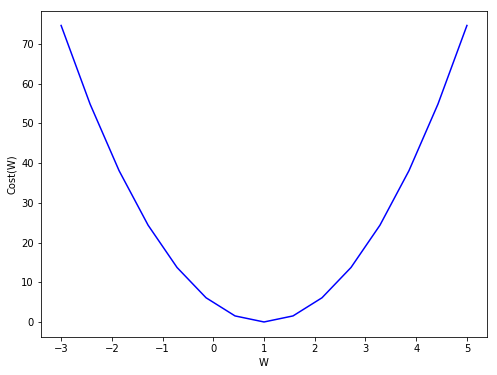

In [6]:
plt.plot(W_values, cost_values, "b")    # (W_values, cost_values)에 대응하는 좌표값들을
                                        # 그리고, 곡선을 파란색으로 표현
plt.ylabel('Cost(W)')    # y축의 label을 Cost(W)로 설정
plt.xlabel('W')    # x축의 label을 W로 설정
plt.show()    # 그림을 출력(Jupyter Notebook을 사용하기 때문에 ptl.show() 없이 그림이 출력되는 상황)

In [7]:
tf.set_random_seed(0)  # 그래프 level의 난수 seed를 설정

x_data = [1., 2., 3., 4.]    # x_data 정의 
y_data = [1., 3., 5., 7.]    # y_data 정의

In [8]:
W = tf.Variable(tf.random_normal([1], -100., 100.))    # 정규분포를 따르는 random number
                                                       # (shape=(1,))를 생성, W가 참조

for step in range(300):    # 300회 시행
    hypothesis = W * X    # hypothesis(가설)을 정의 : W(weight) * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))    # cost function 정의 : (1/m) * ∑(i=1~m) (H(xi)-(yi))^2

    alpha = 0.01    # alpha를 0.01로 설정
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
                                                        # gradient = (1/m) * ∑(i=1~m) (H(xi)-(yi)) * (xi)
    descent = W - tf.multiply(alpha, gradient)    # descent = W - 0.01 * (1/m) * ∑(i=1~m) (H(xi)-(yi)) * (xi)
    W.assign(descent)    # W 갱신(W에 descent 대입)
    
    if step % 10 == 0:    # 10회마다
        # i 값(step), cost function 값, W(weight) 값 출력
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

Instructions for updating:
Colocations handled automatically by placer.
    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074


In [9]:
print(5.0 * W)    # W * 5.0 값을 출력
print(2.5 * W)    # W * 2.5 값을 출력

tf.Tensor([5.0001483], shape=(1,), dtype=float32)
tf.Tensor([2.5000741], shape=(1,), dtype=float32)


In [10]:
W = tf.Variable([5.0])    # W 값을 정의하기 위해 tf.Variable을 생성, [5.0]을 노드에 삽입, shape=(1,)

for step in range(300):    # 300회 시행
    hypothesis = W * X    # hypothesis(가설)을 정의 : W(weight) * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))    # cost function 정의 : (1/m) * ∑(i=1~m) (H(xi)-(yi))^2

    alpha = 0.01    # alpha를 0.01로 설정
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))    
                                                        # gradient = (1/m) * ∑(i=1~m) (H(xi)-(yi)) * (xi)
    descent = W - tf.multiply(alpha, gradient)    # descent = W - 0.01 * (1/m) * ∑(i=1~m) (H(xi)-(yi)) * (xi)
    W.assign(descent)    # W 갱신(W에 descent 대입)

    if step % 10 == 0:    # 10회마다
        # i 값(step), cost function 값, W(weight) 값 출력
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004
